# Clustering en nubes de puntos
### Trabajo Práctico Final- Data Mining 2022- UTN FRBA.
Docente: Dr. Juan Vorobioff

Alumno: Ing. Nicolás Urbano Pintos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics


In [ ]:
!git clone https://github.com/nurbano/tp_final_data_mining

fatal: destination path 'tp_final_data_mining' already exists and is not an empty directory.


In [ ]:
path="./tp_final_data_mining/"
aviones= "aviones.xyz"

## Nube de puntos Aviones
### Cargo el dataset.
En x,y,z cargo las coordenadas de los puntos de la nube de puntos.
En ilum, la iluminancia.
En refle, la reflectancia.
En inte, la intensidad.
Y en nb, los números de retornos.

In [ ]:
x,y,z,ilum,refle,inte,nb= np.loadtxt(path+aviones,skiprows=1, delimiter=";", unpack=True)

In [ ]:
len(x)

144709

###Grafico la nube de puntos

In [ ]:

def graficar(x,y,z,inte):

  fig = plt.figure(figsize=(15,5))

  ax = fig.add_subplot(1,3,1)
  ax.scatter(x,y, s=0.1, c=inte)
  ax.set_title("Vista X e Y")
  ax.set_xlabel("X")
  ax.set_ylabel("Y")

  ax = fig.add_subplot(1,3,2)
  ax.scatter(x,z, s=0.1, c=inte)
  ax.set_title("Vista X y Z")
  ax.set_xlabel("X")
  ax.set_ylabel("Z")

  ax = fig.add_subplot(1,3,3, projection='3d')
  ax.scatter(x,y,z, s=0.1, c=inte)
  ax.set_title("Vista 3D")


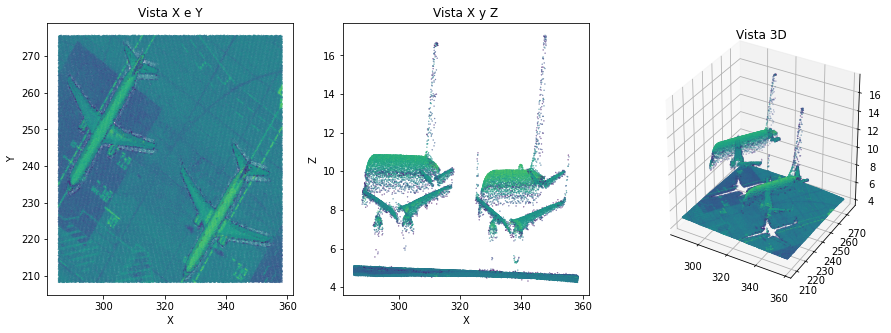

In [ ]:
graficar(x,y,z, inte)

## Separación Manual de Clases

Filtro por eje Z, para separar el piso. Busco el promedio de Z y me quedo con los datos de Z mayor al promedio.
En este caso es útil el promedio porque la mayoria de los puntos del dataset pertecen al suelo.

In [ ]:
filtro= np.mean(z)

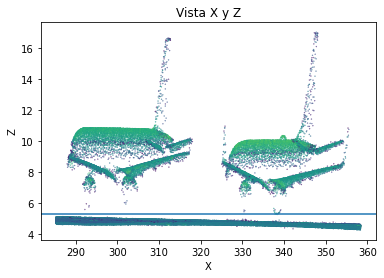

In [ ]:
plt.scatter(x,z,  s=0.1, c=inte)
plt.title("Vista X y Z")
plt.xlabel("X")
plt.ylabel("Z")
plt.axhline(y=filtro)

Si grafico X vs y, observo que se eliminó el suelo aplicando en Z el filtro.
Utilizo la función "column_stack" que provee la librería numpy, la misma apila matrices de 1 dimensión como columnas en un array de 2 dimensiones.

Text(0, 0.5, 'Y')

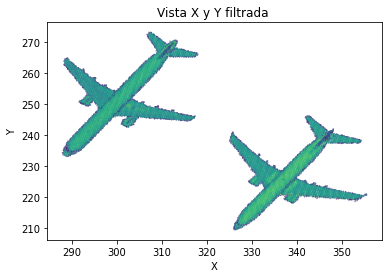

In [ ]:
nube=np.column_stack((x,y,z))
mascara= z>filtro
nube_filtrada= nube[z>filtro]

plt.scatter(x[mascara],y[mascara],  s=0.1, c=inte[mascara])
plt.title("Vista X y Y filtrada ")
plt.xlabel("X")
plt.ylabel("Y")

También se puede graficar en 3 dimensiones

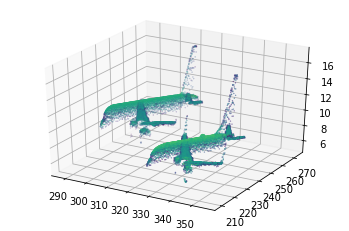

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(x[mascara], y[mascara], z[mascara], s=0.1, c=inte[mascara])
plt.show()

Separo los datos en 3 clases, Avion_1, Avion_2 y piso. Lo hago a partir de la posición en el espacio.

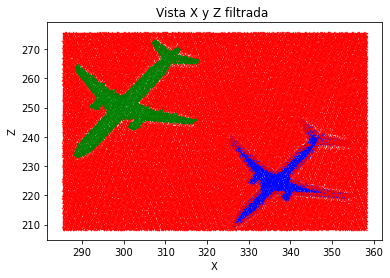

In [ ]:
filtro= np.mean(z)
nube=np.column_stack((x,y,z))
mascara= z>filtro
mascara_avion_1= (z>filtro) & (x>320)
mascara_avion_2= (z>filtro) & (x<320)
nube_filtrada= nube[z>filtro]
mascara_piso= z<=filtro
nube_piso= nube[z<=filtro]
plt.scatter(x[mascara_avion_1],y[mascara_avion_1], s=0.1,c= "blue")
plt.title("Vista X y Z filtrada ")
plt.xlabel("X")
plt.ylabel("Z")
plt.scatter(x[mascara_piso],y[mascara_piso], s=0.1, c="red")
plt.scatter(x[mascara_avion_2],y[mascara_avion_2],  s=0.1 ,c= "green")


In [ ]:
clase=np.zeros(len(mascara_piso))
for i in range(len(clase)):
  if (mascara_piso[i]==1):
    clase[i]= 0
  else:
        if (mascara_avion_1[i]==1):
          clase[i]= 1
        else: 
            if (mascara_avion_2[i]==1):
              clase[i]= 2

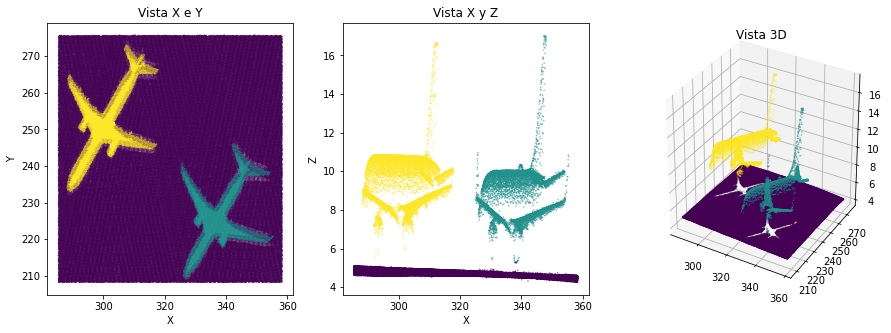

In [ ]:
graficar(x,y,z, clase)

Estas 3 clases, las voy a considerar los valores verdaderos, se va a utilizar para evaluar los diferentes algortimos.

### Agrupamiento
Se utilizaran diferentes algortimos de clustering, implementados gracias a la libreria sklearn. Se utilizaran diferentes métricas para evaluar cual es el que separar mejor a las 3 clases y también inspección visual.

### Métricas
Se define una función para calcular las siguientes métricas

In [ ]:
rand=[]
mutual=[]
homo=[]
complet=[]
fowlkes=[]
silhouette=[]
calinski=[]
davies=[]

def evaluar_clustering(X, clase_pred, clase):
  rand.append(metrics.rand_score(clase, clase_pred))
  mutual.append(metrics.adjusted_mutual_info_score(clase, clase_pred))
  homo.append(metrics.homogeneity_score(clase, clase_pred))
  complet.append(metrics.completeness_score(  clase, clase_pred))
  fowlkes.append(metrics.fowlkes_mallows_score( clase, clase_pred))
  silhouette.append(metrics.silhouette_score(X,clase_pred , metric="euclidean"))
  calinski.append(metrics.calinski_harabasz_score(X,  clase_pred))
  davies.append(metrics.davies_bouldin_score(X, clase_pred))

### K-means


A K-means, hay que indicarle la cantidad de cluster o clases, en este caso es 3.

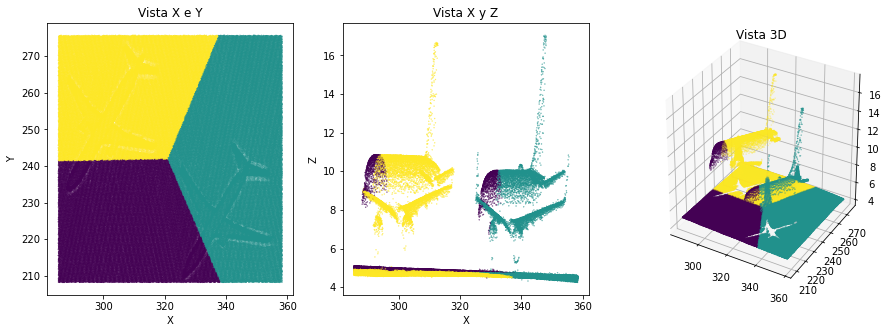

In [ ]:
X=np.column_stack((x, y, z))
kmeans = KMeans(n_clusters=3).fit(X)
clase_pred=kmeans.labels_
graficar(x,y,z, clase_pred)
evaluar_clustering(X, clase_pred, clase)


En este caso se observa que Kmeans no funciona correcamente. En primer lugar no diferencia el suelo de los aviones.

###DBSCAN

Sabemos que DBSCAN agrupa según la densidad. Separa zonas de alta densidad por zonas de baja densidad.
A continuación vamos a evaluar como funciona el algoritmo.

Cantidad de Cluster: 
15


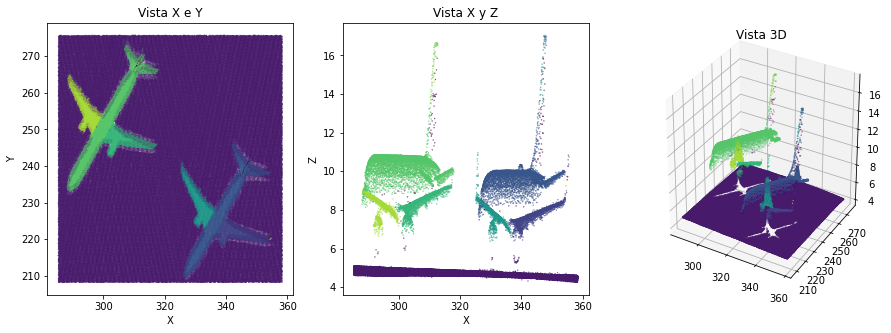

In [ ]:
X= np.column_stack((x, y, z))
cluster_db = DBSCAN().fit(X)
clase_pred=cluster_db.labels_
graficar(x,y,z, clase_pred)
evaluar_clustering(X, clase_pred, clase)
print("Cantidad de Cluster: ")
print(len(set(cluster_db.labels_)) - (1 if -1 in cluster_db.labels_ else 0))


DBSCAN tiene 2 parámetros principales:

eps: La distancia máxima entre dos muestras para que una se considere en la vecindad de la otra. Este no es un límite máximo en las distancias de los puntos dentro de un grupo. Este es el parámetro DBSCAN más importante para elegir adecuadamente para su conjunto de datos y función de distancia.

min_samples: El número de muestras (o peso total) en una vecindad para que un punto se considere un punto central. Esto incluye el punto en sí.

Vamos a variar el valor de eps, para observar si tenemos alguna mejora.

In [ ]:
X= np.column_stack((x, y, z))

n_clusters=[]
eps_=[]
n_cluster= 0
for i in range(10):
  eps_i= 0.5+i*0.05
  cluster_db = DBSCAN(eps=eps_i).fit(X)
  n_clusters.append( len(set(cluster_db.labels_)) - (1 if -1 in cluster_db.labels_ else 0))
  eps_.append(eps_i)

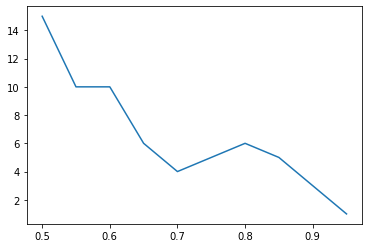

In [ ]:
plt.plot(eps_, n_clusters)

Vamos a utilizar eps=0.7

Cantidad de Cluster: 
4


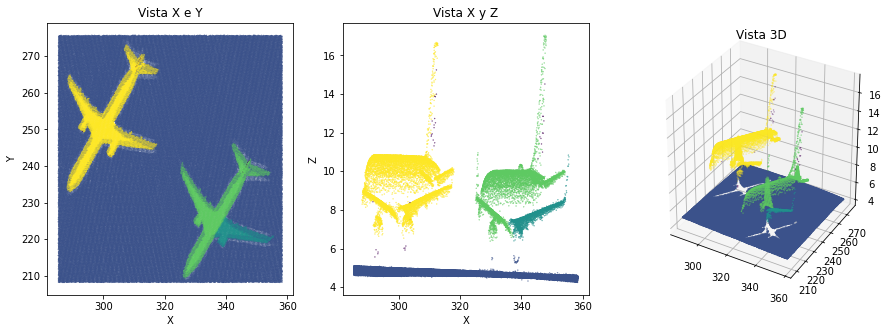

In [ ]:
X= np.column_stack((x, y, z))
cluster_db = DBSCAN(eps=0.7).fit(X)
clase_pred=cluster_db.labels_
graficar(x,y,z, clase_pred)
evaluar_clustering(X, clase_pred, clase)
print("Cantidad de Cluster: ")
print(len(set(cluster_db.labels_)) - (1 if -1 in cluster_db.labels_ else 0))




Se detectaron 4 cluster en vez de 3, pero salvo por el ala derecha del avión 2, se obtuvo uan buena separación.

## Mean-shift clustering

Cantidad de Clúster: 2


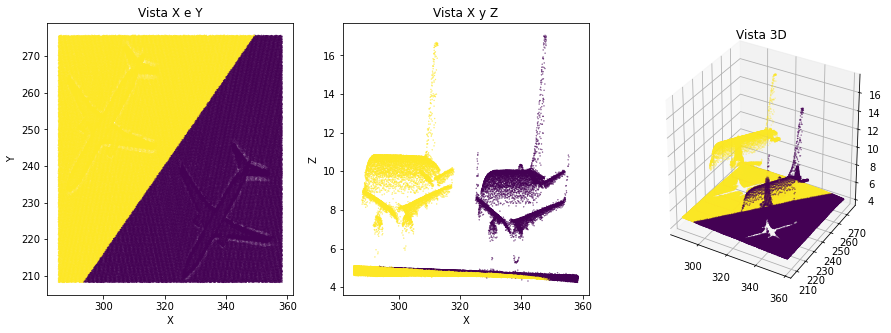

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

clase_pred=ms.labels_
graficar(x,y,z, clase_pred)
evaluar_clustering(X, clase_pred, clase)
print("Cantidad de Clúster: %d" % n_clusters_)


El algortimo en primer lugar estimó el ancho de banda y luego encontró 2 tipos de cluster, diferenció correctamente a los aviones entre si, pero no diferenció a los aviones del suelo.

### Optics
Se ejecutó Optics, tardó más de 10 minutos en computarse, y se detectaron casi 7 mil grupos. Por lo cual se decidió no utilizar este método.

In [ ]:
# from sklearn.cluster import OPTICS
# X= np.column_stack((x, y, z))
# cluster_op = OPTICS().fit(X)
# plt.scatter(x, z, c=cluster_op.labels_, s=0.1)

In [ ]:
# ax = plt.axes(projection='3d')
# ax.scatter(x, y , z, c=cluster_op.labels_, s=0.1)

In [ ]:
# print("Cantidad de Cluster: ")
# print(len(set(cluster_op.labels_)) - (1 if -1 in cluster_op.labels_ else 0))

In [ ]:
# from sklearn.cluster import OPTICS
# X= np.column_stack((x, y, z))
# cluster_op = OPTICS(eps=0.7).fit(X)
# plt.scatter(x, z, c=cluster_op.labels_, s=0.1)

### Birch

En el caso de Birch, hay que pasar como parámetro la cantidad de cluster.

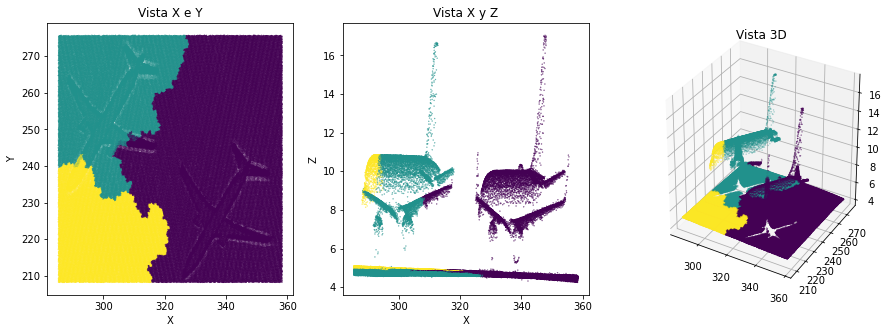

In [ ]:
from sklearn.cluster import Birch

X= np.column_stack((x, y, z))
clustering_birch = Birch(n_clusters=3)
clustering_birch.fit(X)
clase_pred=clustering_birch.labels_
graficar(x,y,z, clase_pred)
evaluar_clustering(X, clase_pred, clase)

Birch no pudo agrupar correcamente a las 3 clases. no diferenció el suelo de los aviones, y creo una clase (amarilla) la cual selecciona solo un poco de suelo y el frente de unos de los aviones.

## Resultados


In [ ]:
metodos=["K-means", "DBscan", "DBscan_0.7", "Mean_shift", "Birch"]

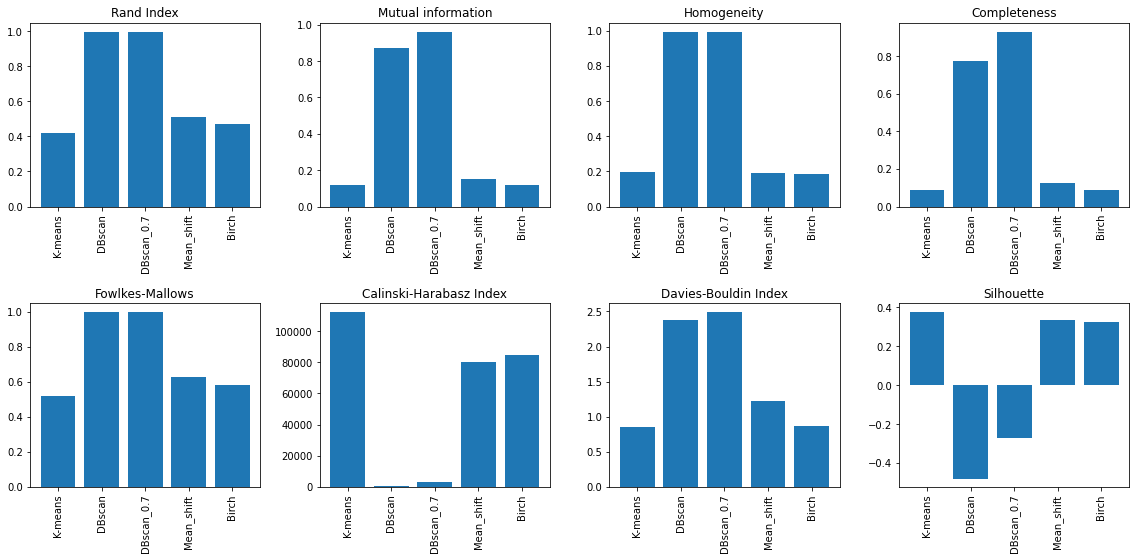

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(2,4,1)
ax.bar(metodos, rand)
plt.xticks(rotation=90)


ax.set_title("Rand Index")

ax = fig.add_subplot(2,4,2)
ax.bar(metodos, mutual)
plt.xticks(rotation=90)

ax.set_title("Mutual information")

ax = fig.add_subplot(2,4,3)
ax.bar(metodos, homo)
plt.xticks(rotation=90)

ax.set_title("Homogeneity")

ax = fig.add_subplot(2,4,4)
ax.bar(metodos, complet)
plt.xticks(rotation=90)

ax.set_title("Completeness")

ax = fig.add_subplot(2,4,5)
ax.bar(metodos, fowlkes)
plt.xticks(rotation=90)

ax.set_title("Fowlkes-Mallows")

ax = fig.add_subplot(2,4,6)
ax.bar(metodos, calinski)
plt.xticks(rotation=90)

ax.set_title("Calinski-Harabasz Index")

ax = fig.add_subplot(2,4,7)
ax.bar(metodos, davies)
plt.xticks(rotation=90)

ax.set_title("Davies-Bouldin Index")

ax = fig.add_subplot(2,4,8)
ax.bar(metodos, silhouette)
plt.xticks(rotation=90)

ax.set_title("Silhouette")

fig.tight_layout(pad=1.5)


In [ ]:
import pandas as pd

df = pd.DataFrame(list(zip(metodos, rand, mutual, homo, complet, fowlkes, calinski, davies, silhouette)),
               columns =['Metodo', 'Rand Index','Mutual Information', 'Homogeneity','Completeness', 'Fowlkes-Mallows', 'Calinski-Harabasz', 'Davies-Bouldin', "Silhouette"])
df

,Metodo,Rand Index,Mutual Information,Homogeneity,Completeness,Fowlkes-Mallows,Calinski-Harabasz,Davies-Bouldin,Silhouette
0,K-means,0.421060,0.119807,0.198907,0.085735,0.518421,112218.459048,0.849907,0.378128
1,DBscan,0.994959,0.871945,0.996137,0.775327,0.996719,905.089102,2.376012,-0.480351
2,DBscan_0.7,0.998439,0.962649,0.996672,0.930875,0.998985,3267.330074,2.491787,-0.272333
3,Mean_shift,0.508349,0.152140,0.188308,0.127641,0.626987,80171.928089,1.221113,0.336508
4,Birch,0.470254,0.119920,0.183945,0.088975,0.580663,84713.135237,0.874263,0.323402


## Conclusiones

### Rand Index
Dado las clases verdaderas, y las predichas, este índice mide la similutd entre 2 asignaciones ignorando las permutaciones.
El ínidce es 1 si está perfectamente etiquetado, agrupamientos incorrectos obtienen valores menores a 1.
Es proporcional al número de pares de muestras cuyas etiquetas son las mismas que las predichas y las verdadera o son diferentes en ambas.

En este caso, los mejores resultados se obtuvieron con las dos implementaciones de DBscan.

### Mutual Information 
Dado las clases verdaderas, y las predichas, está función mide la concordancia de las 2 asignaciones ignorando las permutaciones.
El ínidce es 1 si está perfectamente etiquetado.
En este caso se obtuvo el mejor resultado con DBscan con eps=0.7

### Homogeneity y Completeness
Dado las clases verdaderas, y las predichas, es posible definir alguna métrica intuitiva utilizando el análisis de entropía condicional.

Homogeneidad: Cada grupo contiene solo miembros de una sola clase.

Completitud: todos los miembros de una clase determinada se asignan al mismo grupo.
El resultado es entre 0 y 1. Y 1 significa que el resultado es mejor.

En el caso de homogeneidad los 2 métodos de DBscan obtienen los mejores resultados.

En el caso de Completitud, DBscan_0.7 obtiene la mayor puntuación.

### Fowlkes-Mallows
Se define como el promedio geometrico de "Precision" y "Recall"
El rango de la puntación es entre 0 y 1, y un valor más alto indica una mejor similutd entre 2 clusters. 

En este caso, los mejores resultados se obtuvieron con las dos implementaciones de DBscan.

###Calinski-Harabasz
Es un método que se utiliza cuando no se tienen las etiquetas verdaderas. Se basa en el criterio de la relacion de variancia.
El indice es la relación entre la sima de la dispercion entre cluster y la difereción intra cluster para cada claster.
El valor es más alto cuando los cluster son densos y bien separados.
En este caso se obtuvo el mejor valor con Kmeans.

###Davies-Bouldin
Es un método que se utiliza cuando no se tienen las etiquetas verdaderas.
El índice representa la similitud promedio entre cluster, donde la similitud es una medición que compara la distancia entre cluster con el tamaño de cada cluster.
Un índice menor indica que un modelo es mejor separando clases.
En este caso los mejores resultados se obtuvieron con Kmeans y Birch.

###Silhouette
Es calculado utilizando el promedio de la distancia entre los elementos del cluster y el promedio de la distancia de cluster más cercano para cada muestra.

El mejor valor es 1 y el peor valor es -1. Valores cercanos a 0 indican que hay solapamiento en tre los cluster.
Valores negativos generalmente indnican que una muestra a sido asignada al cluster erroneo.
En este caso se obtiene el mejor resultado en Kmeans.

###Visualización
En este caso se observa que la mejor separación se obtiene utilizando DBscan con eps=0.7.
